In [1]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
RN="1e8"
f = h5py.File(f'./RN1e1_bubble/snapshots_s1.h5', 'r')
T = f['tasks']['buoyancy']
vmin, vmax = np.min(T), np.max(T)
print(np.shape(T)) # dimension = time, x,z
#fig = plt.figure(figsize=(8, 8))
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(15, 15))
for i, tIdx in enumerate(range(0, T.shape[0], 1)):
    ax[i//5, i%5].contourf(np.transpose(T[tIdx,:,:]),50,cmap='seismic',extend='both')
    ax[i//5, i%5].set_title(f"{tIdx}")
f = h5py.File(f'./RN1e1/snapshots_s2.h5', 'r')
T = f['tasks']['buoyancy']
for i, tIdx in enumerate(range(0, T.shape[0], 5)):
    ax[i//5+2, i%5].contourf(np.transpose(T[tIdx,:,:]),50,cmap='seismic',extend='both')
    ax[i//5+2, i%5].set_title(f"{tIdx+50}")

In [4]:
fs1 = [h5py.File(f'./RN1e8_final/snapshots_s{i}.h5', 'r') for i in range(1, 7)]#[f1, f2, f3]
buoy1 = np.vstack(([x["tasks"]["buoyancy"] for x in fs1]))
vort1 = np.vstack(([x["tasks"]["vorticity"] for x in fs1]))
print(buoy1.shape, vort1.shape)

(291, 256, 64) (291, 256, 64)


In [6]:
fs2 = [h5py.File(f'./RN1e5_final/snapshots_s{i}.h5', 'r') for i in range(1, 7)]#[f1, f2, f3]
buoy2 = np.vstack(([x["tasks"]["buoyancy"] for x in fs2]))
vort2 = np.vstack(([x["tasks"]["vorticity"] for x in fs2]))
print(buoy2.shape, vort2.shape)

(300, 256, 64) (300, 256, 64)


In [7]:
Lx, Lz = 4, 1
Nx, Nz = buoy1.shape[1], buoy1.shape[2]
x, z = np.linspace(0, Lx, Nx), np.linspace(0, Lz, Nz)
mx, mz = np.meshgrid(x, z)
print(mx.shape)

(64, 256)


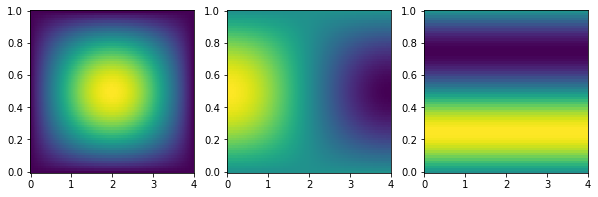

In [8]:
ss = np.sin(np.pi * mx / Lx) * np.sin(np.pi * mz / Lz)
cs = np.cos(np.pi * mx / Lx) * np.sin(np.pi * mz / Lz)
s = np.sin(2 * np.pi * mz / Lz)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
ax[0].pcolormesh(mx, mz, ss, shading="nearest")
ax[1].pcolormesh(mx, mz, cs, shading="nearest")
ax[2].pcolormesh(mx, mz, s, shading="nearest")

In [9]:
xt, yt, zt = np.zeros(shape=vort1.shape[0]), np.zeros(shape=buoy1.shape[0]), np.zeros(shape=buoy1.shape[0])
x2, y2, z2 = np.zeros(shape=vort2.shape[0]), np.zeros(shape=buoy2.shape[0]), np.zeros(shape=buoy2.shape[0])
for tIdx in range(buoy1.shape[0]):
    xt[tIdx] = np.sum(vort1[tIdx] * ss.transpose()) / np.sum(ss.transpose() ** 2)
    yt[tIdx] = np.sum(buoy1[tIdx] * cs.transpose()) / np.sum(ss.transpose() ** 2)
for tIdx in range(buoy2.shape[0]):
    x2[tIdx] = np.sum(vort2[tIdx] * ss.transpose()) / np.sum(ss.transpose() ** 2)
    y2[tIdx] = np.sum(buoy2[tIdx] * cs.transpose()) / np.sum(ss.transpose() ** 2)

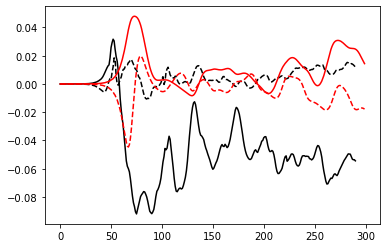

In [10]:
plt.plot(xt, c='black')
plt.plot(yt, '--', c='black')
plt.plot(x2, c='red')
plt.plot(y2, '--', c='red')

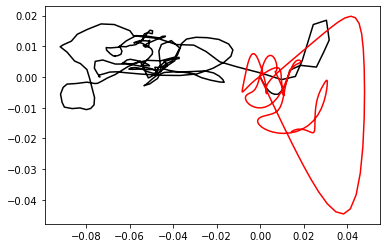

In [11]:
plt.plot(xt, yt, label="1e8", color='black')
plt.plot(x2, y2, label="1e5", color='red')